
##Simple Linear Regression Assignment 

##Salary_Hike

In [2]:
import pandas as pd
import numpy as np
salary_data = pd.read_csv("/content/Salary_Data.csv")
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
# Count of No. of Duplicated Rows
salary_data[salary_data.duplicated()].shape

(0, 2)

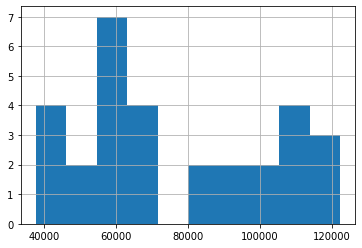

In [5]:
# Outlier Detection

#Histogram of Salary

import matplotlib.pyplot as plt

salary_data['Salary'].hist()

{'boxes': [<matplotlib.lines.Line2D at 0x7f79cef46610>],
 'caps': [<matplotlib.lines.Line2D at 0x7f79cef4f650>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f79cef57690>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f79cef57150>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f79cef46b90>,
  <matplotlib.lines.Line2D at 0x7f79cef4f110>]}

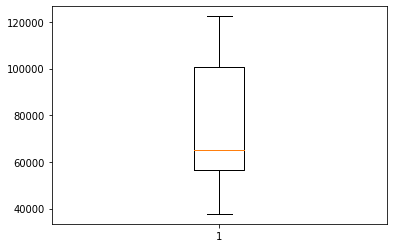

In [6]:
#Box Plot

plt.boxplot(salary_data['Salary'])

In [7]:
# Since there is no outlier in the given dataset, now we can proceed to findout the correlation

Now Finding the Correlataion



In [8]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


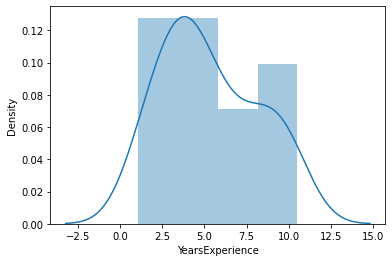

In [9]:
import seaborn as sns
sns.distplot(salary_data['YearsExperience'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


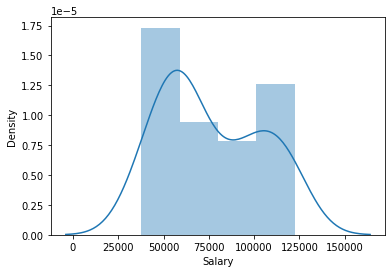

In [10]:
sns.distplot(salary_data['Salary'])

Fitting a Linear Regression Model

In [11]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience", data=salary_data).fit()
model

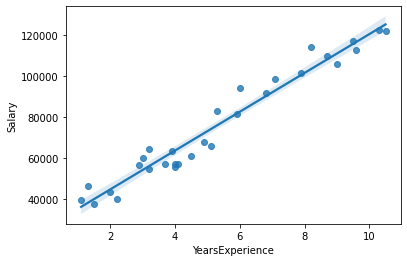

In [12]:
sns.regplot(x="YearsExperience", y="Salary", data = salary_data)

In [13]:
#Coeffiecients

model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [14]:
# t values & p-values
print(model.tvalues, '\n', model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [15]:
# R Sqaured Value

model.rsquared, model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

Predict for new Data Points

In [16]:
# Predict for 12 & 15 years of Experience

new_salary_data = pd.Series([12,15])
salary_pred = pd.DataFrame(new_salary_data,columns=["YearsExperience"]) 
salary_pred

,YearsExperience
0,12
1,15


In [17]:
model.predict(salary_pred)


0    139191.748056
1    167541.635020
dtype: float64

Delivery_Time

In [18]:
delivery_time = pd.read_csv("/content/delivery_time.csv")
delivery_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [19]:
delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [20]:
# Checking the duplicated row

delivery_time[delivery_time.duplicated()].shape

(0, 2)

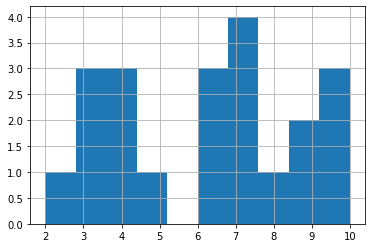

In [21]:
# Outlier detection

delivery_time["Sorting Time"].hist()


{'boxes': [<matplotlib.lines.Line2D at 0x7f79ce3cc610>],
 'caps': [<matplotlib.lines.Line2D at 0x7f79ce3d3610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f79ce3d9650>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f79ce3d9110>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f79ce3ccb50>,
  <matplotlib.lines.Line2D at 0x7f79ce3d30d0>]}

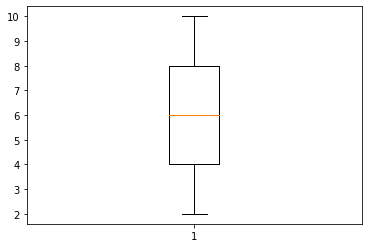

In [22]:
# Box Plot 

plt.boxplot(delivery_time['Sorting Time'])

In [23]:
# Since there is no outlier in the given dataset, now we can proceed to findout the correlation

In [24]:
# Fininding the Correlation

delivery_time.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


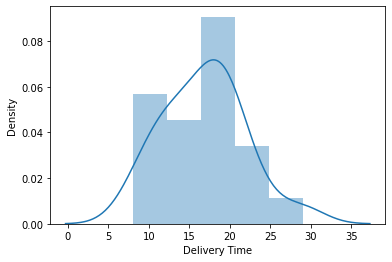

In [25]:
sns.distplot(delivery_time["Delivery Time"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


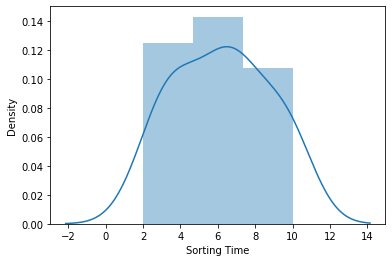

In [26]:
sns.distplot(delivery_time["Sorting Time"])

In [27]:
# Rename the Columns Name

delivery_time_cleaned =  delivery_time.rename({'Delivery Time':'DlvryTime', 'Sorting Time':'SrtngTime'}, axis=1)
delivery_time_cleaned

,DlvryTime,SrtngTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [28]:
#Fitting the Best Linear Regression Model

import statsmodels.formula.api as smf
model=smf.ols("DlvryTime~SrtngTime" ,data = delivery_time_cleaned).fit()


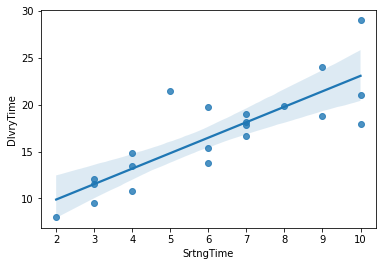

In [31]:
sns.regplot(x='SrtngTime', y='DlvryTime', data=delivery_time_cleaned)

In [33]:
#Coefficients
model.params

Intercept    6.582734
SrtngTime    1.649020
dtype: float64

In [36]:
#t and p values
print(model.tvalues, '\n', model.pvalues)

Intercept    3.823349
SrtngTime    6.387447
dtype: float64 
 Intercept    0.001147
SrtngTime    0.000004
dtype: float64


In [37]:
#R Squared values
(model.rsquared, model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

##Predict for the new data point

In [46]:
#Predict delivery time for having soring time for 12 and 15
newdata = pd.Series([12,15]) 

In [47]:
sortingtime_pred = pd.DataFrame(newdata, columns=['SrtngTime'])
sortingtime_pred

,SrtngTime
0,12
1,15


In [48]:
model.predict(sortingtime_pred)

0    26.370973
1    31.318032
dtype: float64